In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import json
import cv2
import os

from tqdm import tqdm

In [2]:
def create_directory():
    os.makedirs("tusimple/images",exist_ok=True)
    os.makedirs("tusimple/mask",exist_ok=True)
    

In [3]:
create_directory()

In [4]:
masks_details={}
label_name=['label_data_0313.json','label_data_0531.json','label_data_0601.json']
for label in tqdm(label_name):
    with open(f"/kaggle/input/tusimple/TUSimple/train_set/{label}",'r') as f:
        while True:
            try:
                a=json.loads(f.readline())
                masks_details[a['raw_file']]=a
            except Exception as E:
                print(E)
                break

100%|██████████| 3/3 [00:00<00:00, 15.90it/s]

Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)


In [5]:
# path_format -> clips_folderName_nestedFolderName_img_name
clips_path="/kaggle/input/tusimple/TUSimple/train_set/clips"
import shutil

for clipss in tqdm(os.listdir(clips_path)):
    for clips in os.listdir(os.path.join(clips_path,clipss)):
        for clip in os.listdir(os.path.join(clips_path,clipss,clips)):
            img_path=os.path.join(clips_path,clipss,clips,clip)
            new_path=f"tusimple/images/clips_{clipss}_{clips}_{clip}"
            if not os.path.isfile(new_path) and masks_details.get(f'clips/{clipss}/{clips}/{clip}',0)!=0:
                shutil.copy(img_path,new_path)

100%|██████████| 4/4 [01:14<00:00, 18.64s/it]


In [6]:
all_images=os.listdir("/kaggle/working/tusimple/images")
print(len(all_images)),len(masks_details)

3626


(None, 3626)

In [7]:
all_images=os.listdir("/kaggle/working/tusimple/images")
output_path="/kaggle/working/tusimple/mask"
for img in tqdm(all_images):
    mask_key=img.split('_')[0]+'/'+img.split('_')[1]+'/'+img.split('_')[2]+'/'+img.split('_')[3]
    temp=masks_details[mask_key]
    horz=temp['h_samples']
    lanes=temp['lanes']
    coord=[]
    mask=np.zeros((720,1280), dtype=np.uint8)
    for lane in lanes:
        points=[]
        for y,x in zip(horz,lane):
            if x!=-2:
                points.append([x,y])
        if len(points)>1:
            points = np.array(points, dtype=np.int32).reshape((-1,1,2))
            cv2.polylines(mask, [points], False, color=(255,255,255), thickness=25)
    if not os.path.isfile(output_path+'/'+img):
        cv2.imwrite(os.path.join(output_path,img),mask)
    # plt.imshow(mask,cmap='gray')
    # plt.show()

100%|██████████| 3626/3626 [00:07<00:00, 494.89it/s]


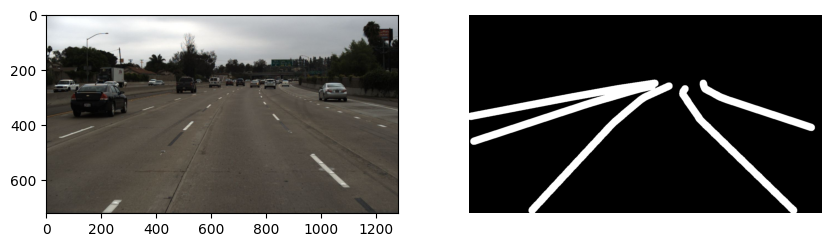

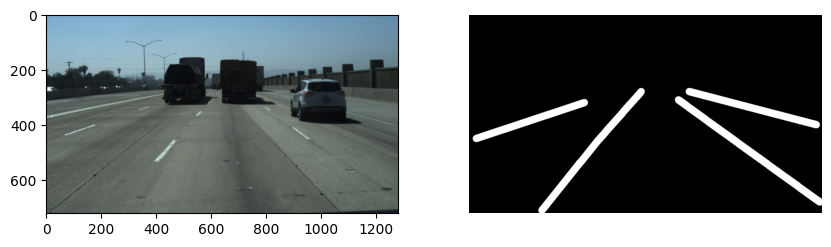

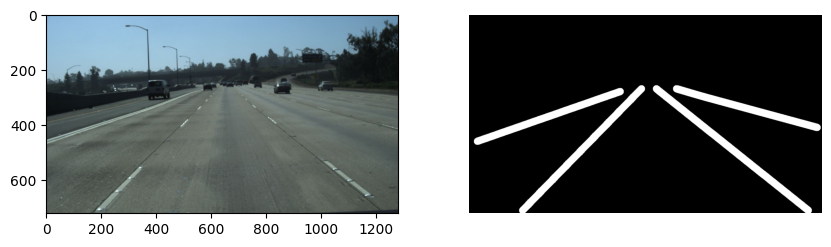

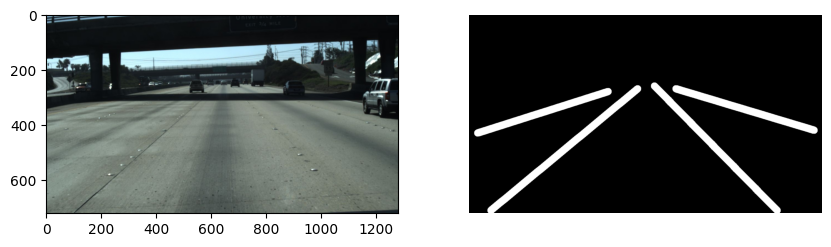

<Figure size 640x480 with 0 Axes>

In [8]:
base_dir=os.path.join("/kaggle","working","tusimple")

images=random.sample(sorted(os.listdir(os.path.join(base_dir,'images'))),4)

a=None
for i in range(len(images)):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  a=plt.imread(os.path.join(base_dir,'images',images[i]))
  plt.imshow(plt.imread(os.path.join(base_dir,'images',images[i])))
  plt.subplot(1,2,2)
  a=plt.imread(os.path.join(base_dir,'mask',images[i]))
  plt.imshow(plt.imread(os.path.join(base_dir,'mask',images[i])),cmap='gray')
  plt.axis('off')
  plt.show()
plt.tight_layout()

In [9]:
# validation data

all_images=os.listdir("/kaggle/working/tusimple/images")
val_images=random.sample(all_images,200)
all_images=[i for i in all_images if i not in val_images]
test_images=random.sample(all_images,300)
all_images=[i for i in all_images if i not in test_images]

os.makedirs("tusimple/train/images/images",exist_ok=True)
os.makedirs("tusimple/train/mask/mask",exist_ok=True)
os.makedirs("tusimple/val/images/images",exist_ok=True)
os.makedirs("tusimple/val/mask/mask",exist_ok=True)
os.makedirs("tusimple/test/images/images",exist_ok=True)
os.makedirs("tusimple/test/mask/mask",exist_ok=True)
    
for i in tqdm(val_images):
    img_path=f"/kaggle/working/tusimple/images/{i}"
    new_path=f"/kaggle/working/tusimple/val/images/images/{i}"
    shutil.move(img_path,new_path)
    img_path=f"/kaggle/working/tusimple/mask/{i}"
    new_path=f"/kaggle/working/tusimple/val/mask/mask/{i}"
    shutil.move(img_path,new_path)
    
for i in tqdm(test_images):
    img_path=f"/kaggle/working/tusimple/images/{i}"
    new_path=f"/kaggle/working/tusimple/test/images/images/{i}"
    shutil.move(img_path,new_path)
    img_path=f"/kaggle/working/tusimple/mask/{i}"
    new_path=f"/kaggle/working/tusimple/test/mask/mask/{i}"
    shutil.move(img_path,new_path)
    
for i in tqdm(all_images):
    img_path=f"/kaggle/working/tusimple/images/{i}"
    new_path=f"/kaggle/working/tusimple/train/images/images/{i}"
    shutil.move(img_path,new_path)
    img_path=f"/kaggle/working/tusimple/mask/{i}"
    new_path=f"/kaggle/working/tusimple/train/mask/mask/{i}"
    shutil.move(img_path,new_path)

100%|██████████| 3126/3126 [00:00<00:00, 19919.71it/s]


In [10]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import plotly.express as px

2025-11-07 19:45:22.822845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762544723.028281      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762544723.084211      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
# 256,256 is giving me mean_iou: 0.3666 after 10 epochs
input_shape=(512,512,3)
mask_shape=(512,512,1)
BATCH_SIZE=32

In [12]:
def create_conv_block(n1,n2,k1,k2,l):
  l=layers.Conv2D(n1,k1,activation='relu',padding='same')(l)
  l=layers.Conv2D(n2,k2,activation='relu',padding='same')(l)
  return l

In [13]:
# input=layers.Input(shape=input_shape)

# c1=create_conv_block(16,16,3,3,input)

# c2=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c1)
# c2=create_conv_block(32,32,3,3,c2)

# c3=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c2)
# c3=create_conv_block(64,64,3,3,c3)

# c4=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c3)
# c4=create_conv_block(128,128,3,3,c4)


# bottom=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c4)
# conv_1x1=layers.Conv2D(256,1,activation='relu',padding='same')(bottom)
# conv_1x1_2=layers.Conv2D(256,1,activation='relu',padding='same')(conv_1x1)

# c4_up=layers.Conv2DTranspose(128,2,strides=(2,2),padding='same')(conv_1x1_2)
# c4_up=layers.concatenate([c4,c4_up])
# c4_up=create_conv_block(128,128,3,3,c4_up)

# c3_up=layers.Conv2DTranspose(64,2,strides=(2,2),padding='same')(c4_up)
# c3_up=layers.concatenate([c3,c3_up])
# c3_up=create_conv_block(64,64,3,3,c3_up)

# c2_up=layers.Conv2DTranspose(32,2,strides=(2,2),padding='same')(c3_up)
# c2_up=layers.concatenate([c2,c2_up])
# c2_up=create_conv_block(32,32,3,3,c2_up)

# c1_up=layers.Conv2DTranspose(16,2,strides=(2,2),padding='same')(c2_up)
# c1_up=layers.concatenate([c1,c1_up])
# c1_up=create_conv_block(16,16,3,3,c1_up)

# output=layers.Conv2D(1,1,activation='sigmoid')(c1_up)


# model=keras.Model(inputs=input,outputs=output)
# input=layers.Input(shape=input_shape)

# c1=create_conv_block(64,64,3,3,input)

# c2=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c1)
# c2=create_conv_block(128,128,3,3,c2)

# c3=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c2)
# c3=create_conv_block(256,256,3,3,c3)

# c4=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c3)
# c4=create_conv_block(512,512,3,3,c4)


# bottom=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c4)
# conv_1x1=layers.Conv2D(1024,1,activation='relu',padding='same')(bottom)
# conv_1x1_2=layers.Conv2D(1024,1,activation='relu',padding='same')(conv_1x1)

# c4_up=layers.Conv2DTranspose(512,2,strides=(2,2),padding='same')(conv_1x1_2)
# c4_up=layers.concatenate([c4,c4_up])
# c4_up=create_conv_block(512,512,3,3,c4_up)

# c3_up=layers.Conv2DTranspose(256,2,strides=(2,2),padding='same')(c4_up)
# c3_up=layers.concatenate([c3,c3_up])
# c3_up=create_conv_block(256,256,3,3,c3_up)

# c2_up=layers.Conv2DTranspose(128,2,strides=(2,2),padding='same')(c3_up)
# c2_up=layers.concatenate([c2,c2_up])
# c2_up=create_conv_block(128,128,3,3,c2_up)

# c1_up=layers.Conv2DTranspose(64,2,strides=(2,2),padding='same')(c2_up)
# c1_up=layers.concatenate([c1,c1_up])
# c1_up=create_conv_block(64,64,3,3,c1_up)

# output=layers.Conv2D(1,1,activation='sigmoid')(c1_up)


# model=keras.Model(inputs=input,outputs=output)

# VGG-NET

In [14]:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import VGG16

# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     return x

# def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

# def build_vgg16_unet(input_shape):
#     """ Input """
#     inputs = Input(input_shape)

#     """ Pre-trained VGG16 Model """
#     vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)

#     """ Encoder """
#     s1 = vgg16.get_layer("block1_conv2").output         ## (512 x 512)
#     s2 = vgg16.get_layer("block2_conv2").output         ## (256 x 256)
#     s3 = vgg16.get_layer("block3_conv3").output         ## (128 x 128)
#     s4 = vgg16.get_layer("block4_conv3").output         ## (64 x 64)

#     """ Bridge """
#     b1 = vgg16.get_layer("block5_conv3").output         ## (32 x 32)

#     """ Decoder """
#     d1 = decoder_block(b1, s4, 512)                     ## (64 x 64)
#     d2 = decoder_block(d1, s3, 256)                     ## (128 x 128)
#     d3 = decoder_block(d2, s2, 128)                     ## (256 x 256)
#     d4 = decoder_block(d3, s1, 64)                      ## (512 x 512)

#     """ Output """
#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

#     model = Model(inputs, outputs, name="VGG16_U-Net")
#     return model
# model=build_vgg16_unet(input_shape)

# E-NET

<!-- ### Attention maps in enet-sad
<img src="https://i.postimg.cc/DybGy0pt/image.png"> -->

In [15]:
def bottleneck_downsampling(n,layer,reg,dropout):
    pool=MaxPool2D(pool_size=2,strides=2)(layer)
    
    conv1x1=Conv2D(n//4,kernel_size=(2,2),strides=2,padding='same',use_bias=False)(layer)
    conv1x1=BatchNormalization()(conv1x1)
    conv1x1=PReLU(shared_axes=[1, 2])(conv1x1)
    
    conv=Conv2D(n//4,kernel_size=(3,3),strides=1,padding='same',use_bias=False)(conv1x1)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    
    conv_2_1x1=Conv2D(n,kernel_size=1,strides=1,padding='same',kernel_regularizer=reg,use_bias=False)(conv)
    conv_2_1x1=BatchNormalization()(conv_2_1x1)
    conv_2_1x1=SpatialDropout2D(dropout)(conv_2_1x1)

    # if shape mismatches 
    if K.int_shape(pool)[-1] != n:
        pool = Conv2D(n, kernel_size=1, padding='same', use_bias=False)(pool)


    final=Add()([conv_2_1x1,pool])
    final=PReLU(shared_axes=[1, 2])(final)
    
    return final

def bottleneck_regular(n,layer,reg,dropout):
    conv1x1=Conv2D(n//4,kernel_size=1,strides=1,padding='same',use_bias=False)(layer)
    conv1x1=BatchNormalization()(conv1x1)
    conv1x1=PReLU(shared_axes=[1, 2])(conv1x1)
    
    conv=Conv2D(n//4,kernel_size=3,strides=1,padding='same',use_bias=False)(conv1x1)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    
    conv_2_1x1=Conv2D(n,kernel_size=1,strides=1,padding='same',kernel_regularizer=reg,use_bias=False)(conv)
    conv_2_1x1=BatchNormalization()(conv_2_1x1)
    conv_2_1x1=SpatialDropout2D(dropout)(conv_2_1x1)

    final=Add()([conv_2_1x1,layer])
    final=PReLU(shared_axes=[1, 2])(final)
    
    return final

def bottleneck_asym(n,layer,reg,dropout):
    conv1x1=Conv2D(n//4,kernel_size=1,strides=1,padding='same',use_bias=False)(layer)
    conv1x1=BatchNormalization()(conv1x1)
    conv1x1=PReLU(shared_axes=[1, 2])(conv1x1)
    
    conv=Conv2D(n//4,kernel_size=(5,1),strides=1,padding='same',use_bias=False)(conv1x1)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    conv=Conv2D(n//4,kernel_size=(1,5),strides=1,padding='same',use_bias=False)(conv)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    
    conv_2_1x1=Conv2D(n,kernel_size=1,strides=1,padding='same',kernel_regularizer=reg,use_bias=False)(conv)
    conv_2_1x1=BatchNormalization()(conv_2_1x1)
    conv_2_1x1=SpatialDropout2D(dropout)(conv_2_1x1)

    final=Add()([conv_2_1x1,layer])
    final=PReLU(shared_axes=[1, 2])(final)
    
    return final
    

def bottleneck_dilated(n,layer,reg,dropout,dilation):
    conv1x1=Conv2D(n//4,kernel_size=1,strides=1,padding='same',use_bias=False)(layer)
    conv1x1=BatchNormalization()(conv1x1)
    conv1x1=PReLU(shared_axes=[1, 2])(conv1x1)
    
    conv=Conv2D(n//4,kernel_size=3,strides=1,padding='same',dilation_rate=dilation,use_bias=False)(conv1x1)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    
    conv_2_1x1=Conv2D(n,kernel_size=1,strides=1,padding='same',kernel_regularizer=reg,use_bias=False)(conv)
    conv_2_1x1=BatchNormalization()(conv_2_1x1)
    conv_2_1x1=SpatialDropout2D(dropout)(conv_2_1x1)

    final=Add()([conv_2_1x1,layer])
    final=PReLU(shared_axes=[1, 2])(final)
    
    return final


def bottleneck_upsampling(n,layer,reg,dropout):
    
    conv1x1=Conv2D(n//4,kernel_size=(1,1),strides=1,padding='same',use_bias=False)(layer)
    conv1x1=BatchNormalization()(conv1x1)
    conv1x1=PReLU(shared_axes=[1, 2])(conv1x1)
    
    conv=Conv2DTranspose(n//4,kernel_size=(2,2),strides=2,padding='same',use_bias=False)(conv1x1)
    conv=BatchNormalization()(conv)
    conv=PReLU(shared_axes=[1, 2])(conv)
    
    conv_2_1x1=Conv2D(n,kernel_size=1,strides=1,padding='same',kernel_regularizer=reg,use_bias=False)(conv)
    conv_2_1x1=BatchNormalization()(conv_2_1x1)
    conv_2_1x1=SpatialDropout2D(dropout)(conv_2_1x1)

    pool=Conv2DTranspose(n,kernel_size=2,strides=2,padding='same',use_bias=False)(layer)
    pool=BatchNormalization()(pool)
    
    final=Add()([conv_2_1x1,pool])
    final=PReLU(shared_axes=[1, 2])(final)
    
    return final

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import MaxPool2D,Conv2D,Concatenate,PReLU,Activation,SpatialDropout2D,BatchNormalization,Input,Lambda,Add,Conv2DTranspose

input_layer=Input(input_shape)
reg=regularizers.L2(1e-4)

# encoder 
# initial
initial_pool=MaxPool2D(pool_size=(2, 2),strides=2)(input_layer)
initial=Conv2D(13,kernel_size=3,strides=2,use_bias=False,padding='same')(input_layer)
initial=Concatenate(axis=-1)([initial,initial_pool])
initial=PReLU(shared_axes=[1, 2])(initial)

# layer1  
layer1=bottleneck_downsampling(64,initial,reg,0.01)
layer1=bottleneck_regular(64,layer1,reg,0.01)
layer1=bottleneck_regular(64,layer1,reg,0.01)
layer1=bottleneck_regular(64,layer1,reg,0.01)
layer1=bottleneck_regular(64,layer1,reg,0.01)

# layer 2 
layer2=bottleneck_downsampling(128,layer1,reg,0.1)
layer2=bottleneck_regular(128,layer2,reg,0.1)
layer2=bottleneck_dilated(128,layer2,reg,0.1,2)
layer2=bottleneck_asym(128,layer2,reg,0.1)
layer2=bottleneck_dilated(128,layer2,reg,0.1,4)
layer2=bottleneck_regular(128,layer2,reg,0.1)
layer2=bottleneck_dilated(128,layer2,reg,0.1,8)
layer2=bottleneck_asym(128,layer2,reg,0.1)
layer2=bottleneck_dilated(128,layer2,reg,0.1,16)

# layer 3
layer3=bottleneck_regular(128,layer2,reg,0.1)
layer3=bottleneck_dilated(128,layer3,reg,0.1,2)
layer3=bottleneck_asym(128,layer3,reg,0.1)
layer3=bottleneck_dilated(128,layer3,reg,0.1,4)
layer3=bottleneck_regular(128,layer3,reg,0.1)
layer3=bottleneck_dilated(128,layer3,reg,0.1,8)
layer3=bottleneck_asym(128,layer3,reg,0.1)
layer3=bottleneck_dilated(128,layer3,reg,0.1,16)


# decoder
layer4=bottleneck_upsampling(64,layer3,reg,0.1)
layer4=bottleneck_regular(64,layer4,reg,0.1)
layer4=bottleneck_regular(64,layer4,reg,0.1)

layer5=bottleneck_upsampling(16,layer4,reg,0.1)
layer5=bottleneck_regular(16,layer5,reg,0.1)

out=Conv2DTranspose(1,kernel_size=2, strides=2, padding='same', use_bias=False)(layer5)
out = Activation('sigmoid')(out)

model=Model(inputs=[input_layer],outputs=[out])

I0000 00:00:1762544737.200554      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        351 │ input_layer[0][0] │
│                     │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256, 256,  │          0 │ conv2d[0][0],     │
│ (Concatenate)       │ 16)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu (PReLU)     │ (None, 256, 256,  │         16 │ concatenate[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      1,024 │ p_re_lu[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_1 (PReLU)   │ (None, 128, 128,  │         16 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      2,304 │ p_re_lu_1[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_2 (PReLU)   │ (None, 128, 128,  │         16 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      1,024 │ p_re_lu_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ p_re_lu[0][0]     │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d   │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │      1,024 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ spatial_dropout2

 Total params: 407,215 (1.55 MB)

 Trainable params: 398,639 (1.52 MB)

 Non-trainable params: 8,576 (33.50 KB)

In [18]:
os.makedirs("/kaggle/working/output",exist_ok=True)

In [19]:
from tensorflow.keras import callbacks
images=random.sample(sorted(os.listdir(os.path.join(base_dir,'train','images','images'))),1)
def show_random_images(epoch):
    global images
    for i in range(len(images)):
      plt.figure(figsize=(10,10))
      plt.subplot(1,3,1)
      a=plt.imread(os.path.join(base_dir,'train','images','images',images[i]))
      cv2.imwrite(os.path.join('/kaggle','working','output',images[i],f'_{epoch}'),a)
      plt.imshow(plt.imread(os.path.join(base_dir,'train','images','images',images[i])))
      plt.subplot(1,3,2)
        
      plt.imshow(plt.imread(os.path.join(base_dir,'train','mask','mask',images[i])),cmap='gray')
      plt.subplot(1,3,3)
      a=cv2.resize(a,(input_shape[0],input_shape[1]))
      a=np.expand_dims(a,axis=0)
      a=model.predict(a)[0]
      a=(a > 0.5).astype(np.uint8)
      cv2.imwrite(os.path.join('/kaggle','working','output',images[i],f'_{epoch}.png'),a)
      plt.imshow(a,cmap='gray')
      plt.axis('off')
      plt.tight_layout()
      plt.show()

class random_images(callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        show_random_images(epoch)

In [20]:
# show_random_images()

In [21]:
import tensorflow.keras.backend as K
def mean_iou(y_true, y_pred,smooth=1):
    y_true=K.flatten(y_true)
    y_pred=K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)

In [22]:
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

In [23]:
import tensorflow.keras.backend as K

def tpr(y_true, y_pred, smooth=1e-6):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    # Convert probabilities/logits to binary 0/1
    y_pred_bin = K.round(K.clip(y_pred, 0, 1))

    tp = K.sum(y_true * y_pred_bin)                    # True Positives
    p = K.sum(y_true)                                  # Actual Positives

    return (tp + smooth) / (p + smooth)

In [24]:
import tensorflow.keras.backend as K

def fpr(y_true, y_pred, smooth=1e-6):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    y_pred_bin = K.round(K.clip(y_pred, 0, 1))

    # False Positive: predicted 1 but actually 0
    fp = K.sum((1 - y_true) * y_pred_bin)

    # True Negative: predicted 0 and actually 0
    tn = K.sum((1 - y_true) * (1 - y_pred_bin))

    return (fp + smooth) / (fp + tn + smooth)

In [25]:
def dice_loss(y_true,y_pred):
    return 1-dice_coefficient(y_true,y_pred)

In [26]:
def focal_tversky_loss(y_true, y_pred):
    alpha=0.7
    beta=0.3
    gamma=4/3
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

    tp = K.sum(y_true * y_pred)
    fp = K.sum((1 - y_true) * y_pred)
    fn = K.sum(y_true * (1 - y_pred))

    tversky = (tp + 1e-6) / (tp + alpha * fp + beta * fn + 1e-6)
    return K.pow((1 - tversky), gamma)


In [27]:
model.compile(optimizer='Adam',loss=dice_loss,metrics=['accuracy',mean_iou,dice_coefficient,tpr,fpr,keras.metrics.Precision(),keras.metrics.Recall()])

In [28]:
# generators
train_data_X=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
val_data_X=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
test_data_X=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
train_data_y=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
val_data_y=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
test_data_y=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

base_dir=os.path.join("/kaggle","working","tusimple")
train_data_X=train_data_X.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'train','images'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,seed=42)
val_data_X=val_data_X.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'val','images'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,seed=42)
test_data_X=test_data_X.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'test','images'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,seed=42)

train_data_y=train_data_y.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'train','mask'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,color_mode='grayscale',seed=42)
val_data_y=val_data_y.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'val','mask'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,color_mode='grayscale',seed=42)
test_data_y=test_data_y.flow_from_directory(class_mode=None,directory=os.path.join(base_dir,'test','mask'),target_size=(input_shape[0],input_shape[1]),batch_size=BATCH_SIZE,color_mode='grayscale',seed=42)


Found 3126 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 300 images belonging to 1 classes.
Found 3126 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 300 images belonging to 1 classes.


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(patience=5,monitor='val_loss',verbose=1)
red_lr=ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1)
check_pt=ModelCheckpoint('lane_detection.h5',verbose=1,monitor='val_loss',save_best_only=True)

In [30]:
def combined_data_gen(gen_x,gen_y):
  for x,y in zip(gen_x,gen_y):
    yield x,y

In [31]:
train_data_gen=combined_data_gen(train_data_X,train_data_y)
val_data_gen=combined_data_gen(val_data_X,val_data_y)
test_data_gen=combined_data_gen(test_data_X,test_data_y)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 512, 512, 3))
  warnings.warn(msg)
I0000 00:00:1762544832.528608     105 service.cc:148] XLA service 0x783274070ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762544832.529286     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762544841.709031     105 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762544883.745062     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.6263 - dice_coefficient: 0.1988 - fpr: 0.3768 - loss: 0.8904 - mean_iou: 0.1124 - precision: 0.1678 - recall: 0.8024 - tpr: 0.8071
Epoch 1: val_loss improved from inf to 0.94928, saving model to lane_detection.h5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 512, 512, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


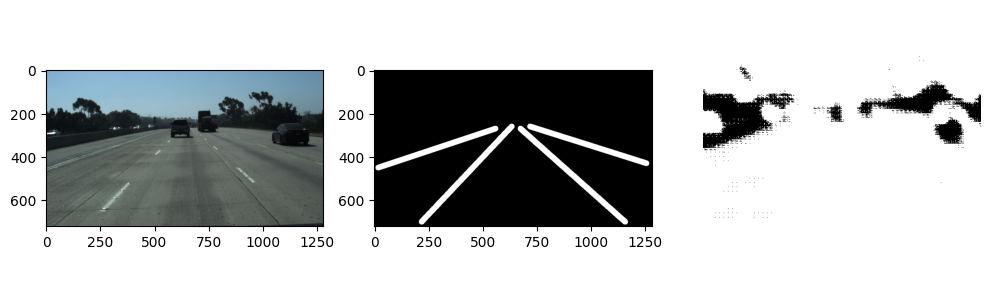

97/97 ━━━━━━━━━━━━━━━━━━━━ 219s 784ms/step - accuracy: 0.6279 - dice_coefficient: 0.1997 - fpr: 0.3752 - loss: 0.8893 - mean_iou: 0.1130 - precision: 0.1687 - recall: 0.8032 - tpr: 0.8080 - val_accuracy: 0.9228 - val_dice_coefficient: 0.1033 - val_fpr: 1.2791e-13 - val_loss: 0.9493 - val_mean_iou: 0.0544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tpr: 1.7525e-12 - learning_rate: 0.0010
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9470 - dice_coefficient: 0.6092 - fpr: 0.0353 - loss: 0.4392 - mean_iou: 0.4423 - precision: 0.7036 - recall: 0.8375 - tpr: 0.8783
Epoch 2: val_loss did not improve from 0.94928
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


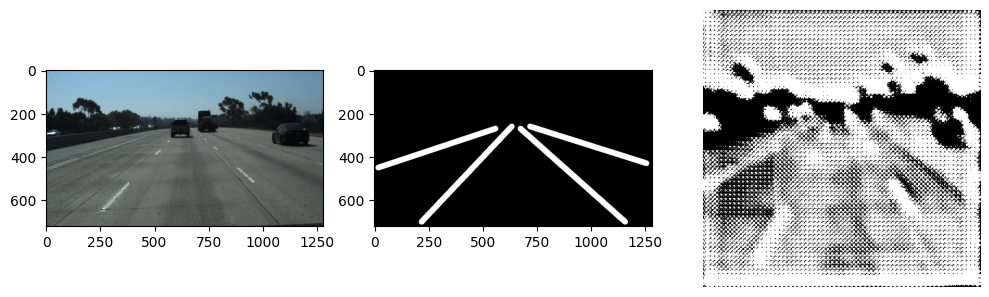

97/97 ━━━━━━━━━━━━━━━━━━━━ 97s 564ms/step - accuracy: 0.9470 - dice_coefficient: 0.6099 - fpr: 0.0352 - loss: 0.4385 - mean_iou: 0.4431 - precision: 0.7040 - recall: 0.8372 - tpr: 0.8781 - val_accuracy: 0.9223 - val_dice_coefficient: 0.0377 - val_fpr: 1.2798e-13 - val_loss: 1.0043 - val_mean_iou: 0.0192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tpr: 1.7403e-12 - learning_rate: 0.0010
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9590 - dice_coefficient: 0.7835 - fpr: 0.0182 - loss: 0.2571 - mean_iou: 0.6443 - precision: 0.8166 - recall: 0.7803 - tpr: 0.8378
Epoch 3: val_loss improved from 0.94928 to 0.93294, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


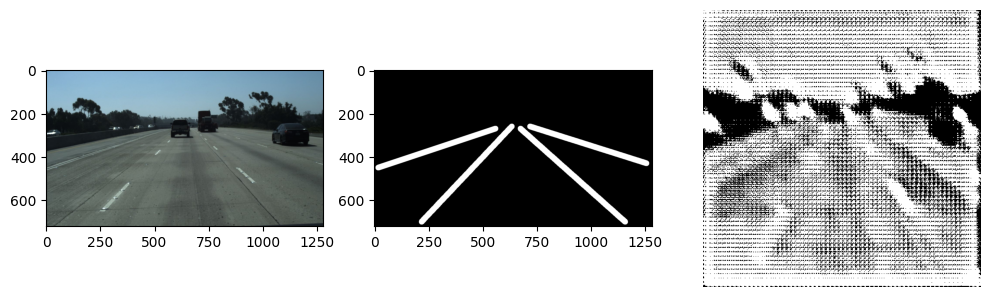

97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.9590 - dice_coefficient: 0.7836 - fpr: 0.0182 - loss: 0.2570 - mean_iou: 0.6444 - precision: 0.8166 - recall: 0.7803 - tpr: 0.8378 - val_accuracy: 0.9251 - val_dice_coefficient: 0.1041 - val_fpr: 1.6722e-04 - val_loss: 0.9329 - val_mean_iou: 0.0550 - val_precision: 0.9709 - val_recall: 0.0482 - val_tpr: 0.0539 - learning_rate: 0.0010
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9613 - dice_coefficient: 0.8087 - fpr: 0.0159 - loss: 0.2270 - mean_iou: 0.6791 - precision: 0.8363 - recall: 0.7787 - tpr: 0.8403
Epoch 4: val_loss improved from 0.93294 to 0.48049, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


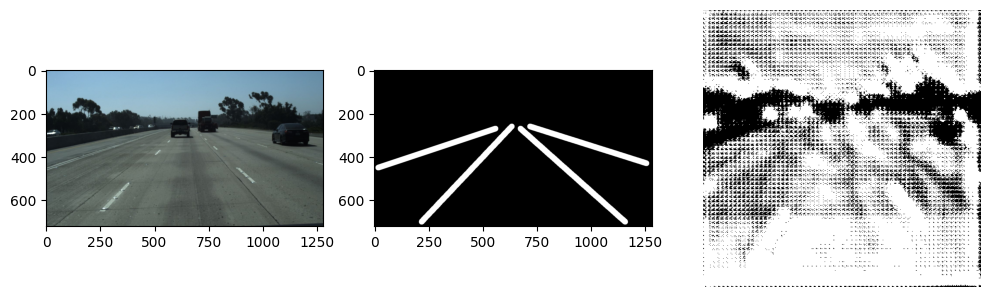

97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.9613 - dice_coefficient: 0.8088 - fpr: 0.0159 - loss: 0.2270 - mean_iou: 0.6792 - precision: 0.8363 - recall: 0.7787 - tpr: 0.8404 - val_accuracy: 0.9438 - val_dice_coefficient: 0.5527 - val_fpr: 0.0065 - val_loss: 0.4805 - val_mean_iou: 0.3823 - val_precision: 0.8534 - val_recall: 0.3943 - val_tpr: 0.4293 - learning_rate: 0.0010
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.9622 - dice_coefficient: 0.8201 - fpr: 0.0152 - loss: 0.2119 - mean_iou: 0.6953 - precision: 0.8446 - recall: 0.7836 - tpr: 0.8468
Epoch 5: val_loss improved from 0.48049 to 0.24326, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


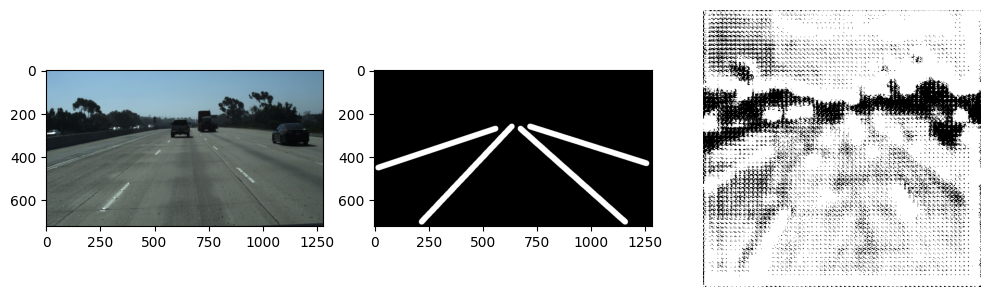

97/97 ━━━━━━━━━━━━━━━━━━━━ 51s 523ms/step - accuracy: 0.9622 - dice_coefficient: 0.8201 - fpr: 0.0152 - loss: 0.2119 - mean_iou: 0.6953 - precision: 0.8446 - recall: 0.7836 - tpr: 0.8468 - val_accuracy: 0.9601 - val_dice_coefficient: 0.7869 - val_fpr: 0.0116 - val_loss: 0.2433 - val_mean_iou: 0.6490 - val_precision: 0.8642 - val_recall: 0.6999 - val_tpr: 0.7603 - learning_rate: 0.0010
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9632 - dice_coefficient: 0.8287 - fpr: 0.0145 - loss: 0.2007 - mean_iou: 0.7076 - precision: 0.8521 - recall: 0.7878 - tpr: 0.8527
Epoch 6: val_loss improved from 0.24326 to 0.20598, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


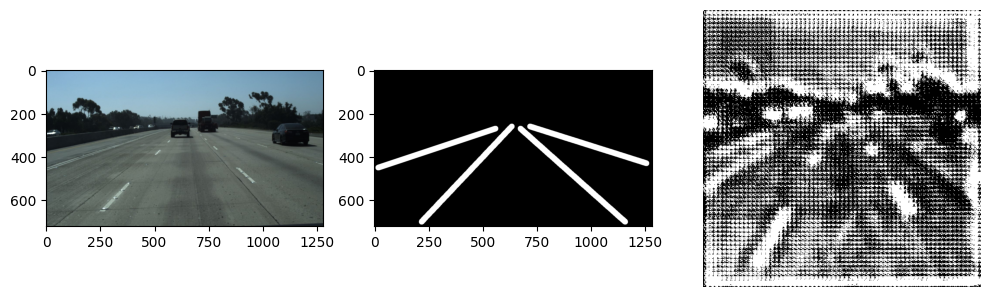

97/97 ━━━━━━━━━━━━━━━━━━━━ 53s 545ms/step - accuracy: 0.9632 - dice_coefficient: 0.8287 - fpr: 0.0145 - loss: 0.2007 - mean_iou: 0.7076 - precision: 0.8521 - recall: 0.7878 - tpr: 0.8527 - val_accuracy: 0.9632 - val_dice_coefficient: 0.8269 - val_fpr: 0.0112 - val_loss: 0.2060 - val_mean_iou: 0.7054 - val_precision: 0.8744 - val_recall: 0.7461 - val_tpr: 0.8166 - learning_rate: 0.0010
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9636 - dice_coefficient: 0.8323 - fpr: 0.0140 - loss: 0.1949 - mean_iou: 0.7129 - precision: 0.8560 - recall: 0.7866 - tpr: 0.8528
Epoch 7: val_loss did not improve from 0.20598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


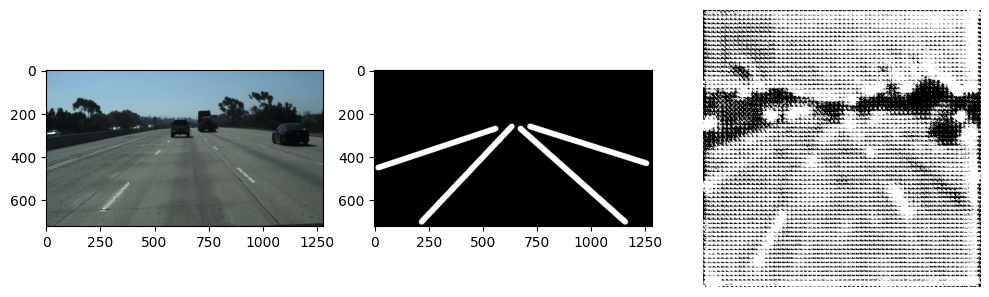

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 534ms/step - accuracy: 0.9636 - dice_coefficient: 0.8323 - fpr: 0.0140 - loss: 0.1949 - mean_iou: 0.7130 - precision: 0.8560 - recall: 0.7866 - tpr: 0.8528 - val_accuracy: 0.9622 - val_dice_coefficient: 0.8132 - val_fpr: 0.0114 - val_loss: 0.2151 - val_mean_iou: 0.6855 - val_precision: 0.8671 - val_recall: 0.7270 - val_tpr: 0.7971 - learning_rate: 0.0010
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9641 - dice_coefficient: 0.8385 - fpr: 0.0135 - loss: 0.1864 - mean_iou: 0.7220 - precision: 0.8627 - recall: 0.7900 - tpr: 0.8571
Epoch 8: val_loss improved from 0.20598 to 0.18842, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


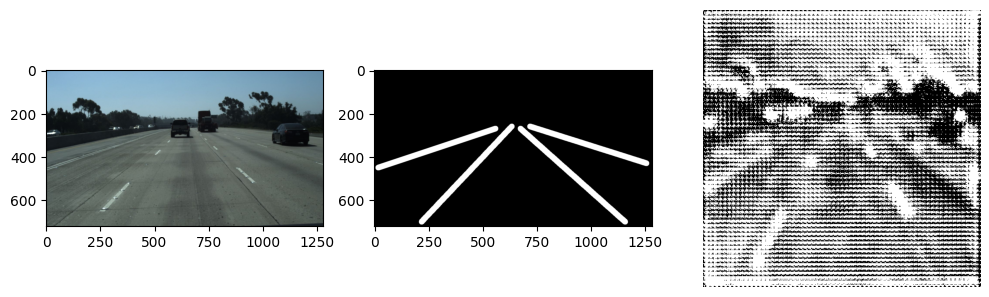

97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 572ms/step - accuracy: 0.9641 - dice_coefficient: 0.8385 - fpr: 0.0135 - loss: 0.1864 - mean_iou: 0.7220 - precision: 0.8627 - recall: 0.7900 - tpr: 0.8571 - val_accuracy: 0.9646 - val_dice_coefficient: 0.8345 - val_fpr: 0.0135 - val_loss: 0.1884 - val_mean_iou: 0.7161 - val_precision: 0.8591 - val_recall: 0.7854 - val_tpr: 0.8544 - learning_rate: 0.0010
Epoch 9/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9646 - dice_coefficient: 0.8419 - fpr: 0.0132 - loss: 0.1811 - mean_iou: 0.7271 - precision: 0.8660 - recall: 0.7918 - tpr: 0.8595
Epoch 9: val_loss did not improve from 0.18842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


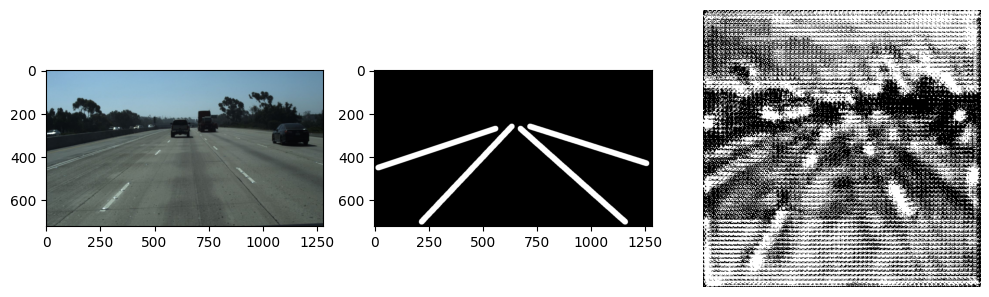

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 535ms/step - accuracy: 0.9646 - dice_coefficient: 0.8419 - fpr: 0.0132 - loss: 0.1811 - mean_iou: 0.7271 - precision: 0.8660 - recall: 0.7918 - tpr: 0.8595 - val_accuracy: 0.9619 - val_dice_coefficient: 0.8134 - val_fpr: 0.0144 - val_loss: 0.2050 - val_mean_iou: 0.6857 - val_precision: 0.8502 - val_recall: 0.7651 - val_tpr: 0.8218 - learning_rate: 0.0010
Epoch 10/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9643 - dice_coefficient: 0.8403 - fpr: 0.0132 - loss: 0.1812 - mean_iou: 0.7248 - precision: 0.8646 - recall: 0.7894 - tpr: 0.8570
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 10: val_loss did not improve from 0.18842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


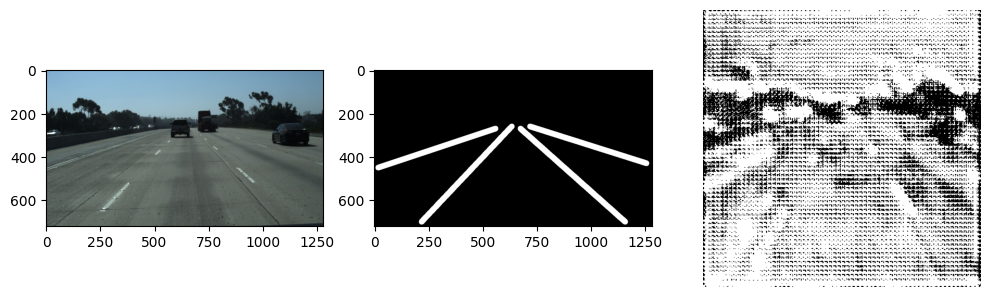

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 534ms/step - accuracy: 0.9643 - dice_coefficient: 0.8403 - fpr: 0.0132 - loss: 0.1811 - mean_iou: 0.7248 - precision: 0.8646 - recall: 0.7894 - tpr: 0.8570 - val_accuracy: 0.9624 - val_dice_coefficient: 0.8223 - val_fpr: 0.0140 - val_loss: 0.1982 - val_mean_iou: 0.6985 - val_precision: 0.8503 - val_recall: 0.7681 - val_tpr: 0.8335 - learning_rate: 0.0010
Epoch 11/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9654 - dice_coefficient: 0.8498 - fpr: 0.0127 - loss: 0.1707 - mean_iou: 0.7389 - precision: 0.8708 - recall: 0.7984 - tpr: 0.8685
Epoch 11: val_loss improved from 0.18842 to 0.17825, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


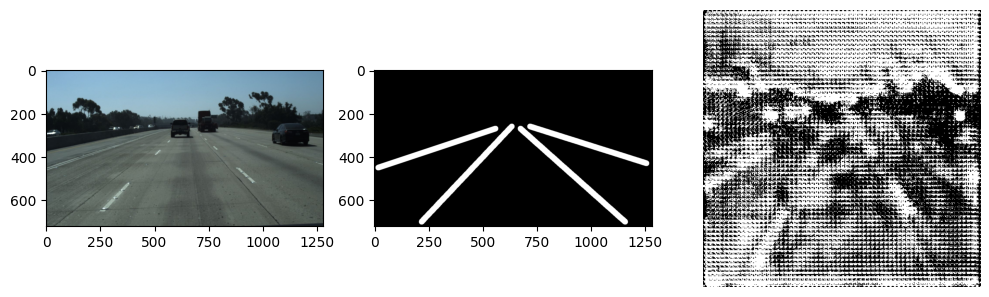

97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 553ms/step - accuracy: 0.9654 - dice_coefficient: 0.8498 - fpr: 0.0127 - loss: 0.1707 - mean_iou: 0.7390 - precision: 0.8709 - recall: 0.7984 - tpr: 0.8685 - val_accuracy: 0.9650 - val_dice_coefficient: 0.8420 - val_fpr: 0.0127 - val_loss: 0.1783 - val_mean_iou: 0.7273 - val_precision: 0.8662 - val_recall: 0.7876 - val_tpr: 0.8566 - learning_rate: 1.0000e-04
Epoch 12/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9665 - dice_coefficient: 0.8560 - fpr: 0.0116 - loss: 0.1643 - mean_iou: 0.7484 - precision: 0.8813 - recall: 0.7972 - tpr: 0.8689
Epoch 12: val_loss improved from 0.17825 to 0.17705, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


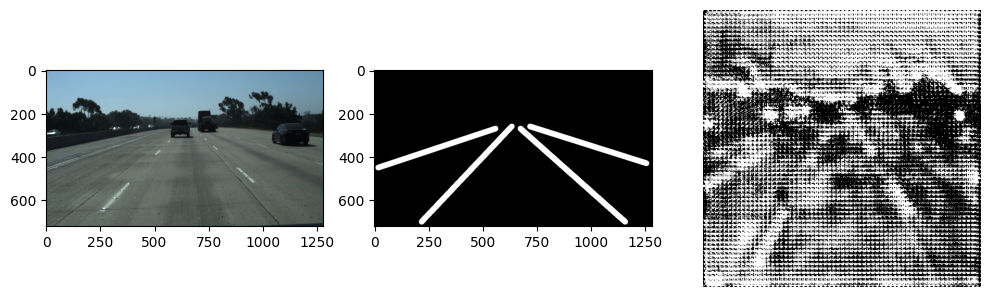

97/97 ━━━━━━━━━━━━━━━━━━━━ 53s 553ms/step - accuracy: 0.9665 - dice_coefficient: 0.8561 - fpr: 0.0116 - loss: 0.1643 - mean_iou: 0.7484 - precision: 0.8813 - recall: 0.7972 - tpr: 0.8690 - val_accuracy: 0.9651 - val_dice_coefficient: 0.8431 - val_fpr: 0.0126 - val_loss: 0.1771 - val_mean_iou: 0.7288 - val_precision: 0.8686 - val_recall: 0.7872 - val_tpr: 0.8562 - learning_rate: 1.0000e-04
Epoch 13/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9668 - dice_coefficient: 0.8593 - fpr: 0.0114 - loss: 0.1608 - mean_iou: 0.7534 - precision: 0.8841 - recall: 0.8005 - tpr: 0.8728
Epoch 13: val_loss did not improve from 0.17705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


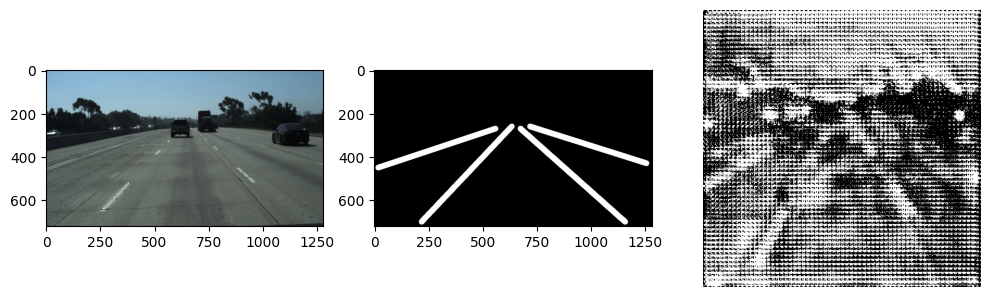

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 539ms/step - accuracy: 0.9668 - dice_coefficient: 0.8592 - fpr: 0.0114 - loss: 0.1608 - mean_iou: 0.7533 - precision: 0.8841 - recall: 0.8005 - tpr: 0.8727 - val_accuracy: 0.9650 - val_dice_coefficient: 0.8436 - val_fpr: 0.0118 - val_loss: 0.1793 - val_mean_iou: 0.7298 - val_precision: 0.8697 - val_recall: 0.7791 - val_tpr: 0.8503 - learning_rate: 1.0000e-04
Epoch 14/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9670 - dice_coefficient: 0.8611 - fpr: 0.0113 - loss: 0.1587 - mean_iou: 0.7563 - precision: 0.8855 - recall: 0.8020 - tpr: 0.8746
Epoch 14: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 14: val_loss did not improve from 0.17705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


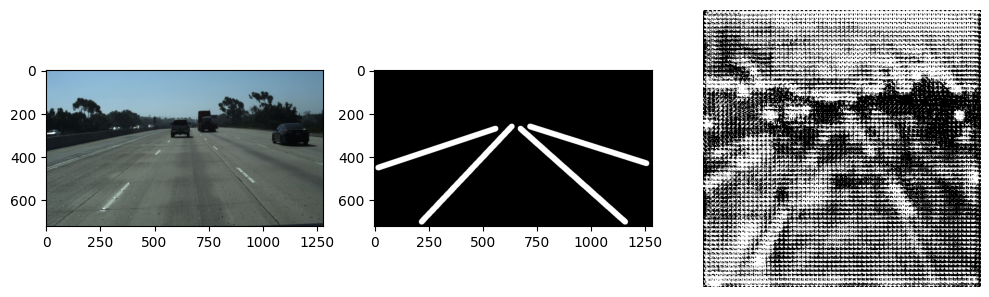

97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 561ms/step - accuracy: 0.9670 - dice_coefficient: 0.8611 - fpr: 0.0113 - loss: 0.1587 - mean_iou: 0.7563 - precision: 0.8855 - recall: 0.8020 - tpr: 0.8746 - val_accuracy: 0.9642 - val_dice_coefficient: 0.8331 - val_fpr: 0.0124 - val_loss: 0.1825 - val_mean_iou: 0.7142 - val_precision: 0.8726 - val_recall: 0.7712 - val_tpr: 0.8345 - learning_rate: 1.0000e-04
Epoch 15/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.9672 - dice_coefficient: 0.8606 - fpr: 0.0112 - loss: 0.1591 - mean_iou: 0.7554 - precision: 0.8864 - recall: 0.8004 - tpr: 0.8727
Epoch 15: val_loss improved from 0.17705 to 0.17628, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


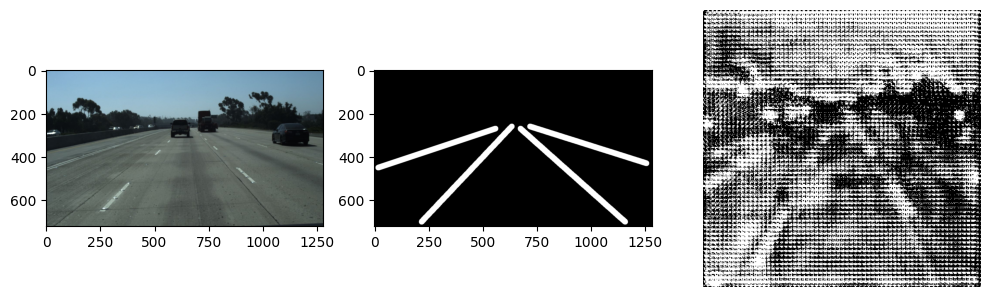

97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 580ms/step - accuracy: 0.9671 - dice_coefficient: 0.8606 - fpr: 0.0112 - loss: 0.1591 - mean_iou: 0.7554 - precision: 0.8864 - recall: 0.8004 - tpr: 0.8727 - val_accuracy: 0.9653 - val_dice_coefficient: 0.8466 - val_fpr: 0.0125 - val_loss: 0.1763 - val_mean_iou: 0.7342 - val_precision: 0.8654 - val_recall: 0.7919 - val_tpr: 0.8621 - learning_rate: 1.0000e-05
Epoch 16/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9670 - dice_coefficient: 0.8614 - fpr: 0.0112 - loss: 0.1583 - mean_iou: 0.7567 - precision: 0.8864 - recall: 0.8008 - tpr: 0.8739
Epoch 16: val_loss did not improve from 0.17628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


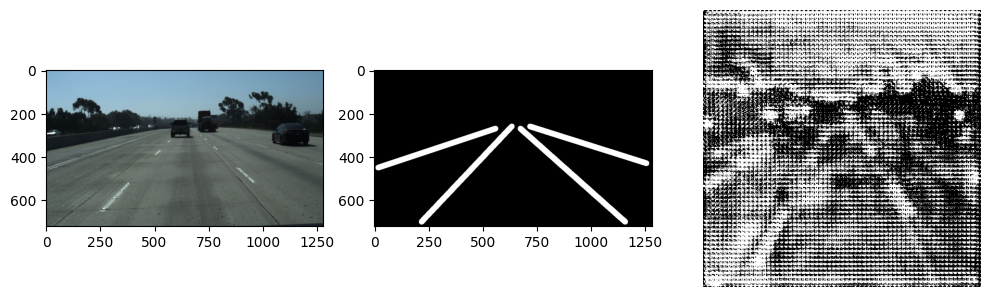

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 543ms/step - accuracy: 0.9670 - dice_coefficient: 0.8614 - fpr: 0.0112 - loss: 0.1583 - mean_iou: 0.7567 - precision: 0.8864 - recall: 0.8009 - tpr: 0.8739 - val_accuracy: 0.9645 - val_dice_coefficient: 0.8429 - val_fpr: 0.0128 - val_loss: 0.1787 - val_mean_iou: 0.7287 - val_precision: 0.8662 - val_recall: 0.7867 - val_tpr: 0.8560 - learning_rate: 1.0000e-05
Epoch 17/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.9671 - dice_coefficient: 0.8615 - fpr: 0.0111 - loss: 0.1581 - mean_iou: 0.7569 - precision: 0.8869 - recall: 0.8008 - tpr: 0.8736
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 17: val_loss did not improve from 0.17628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


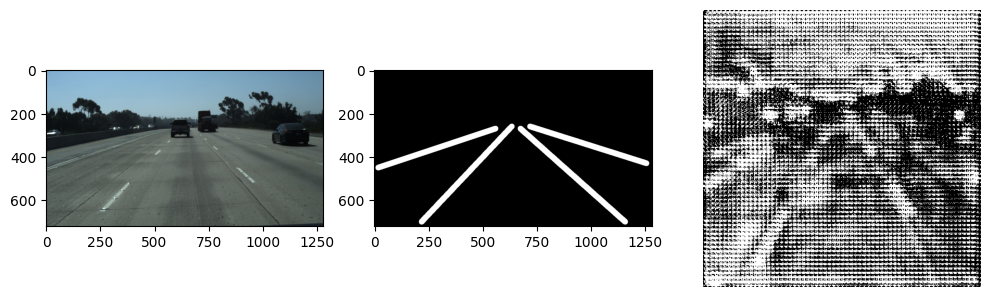

97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 564ms/step - accuracy: 0.9671 - dice_coefficient: 0.8615 - fpr: 0.0111 - loss: 0.1581 - mean_iou: 0.7569 - precision: 0.8869 - recall: 0.8008 - tpr: 0.8736 - val_accuracy: 0.9644 - val_dice_coefficient: 0.8390 - val_fpr: 0.0130 - val_loss: 0.1806 - val_mean_iou: 0.7229 - val_precision: 0.8645 - val_recall: 0.7853 - val_tpr: 0.8527 - learning_rate: 1.0000e-05
Epoch 18/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.9671 - dice_coefficient: 0.8621 - fpr: 0.0112 - loss: 0.1575 - mean_iou: 0.7578 - precision: 0.8869 - recall: 0.8027 - tpr: 0.8752
Epoch 18: val_loss improved from 0.17628 to 0.17614, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


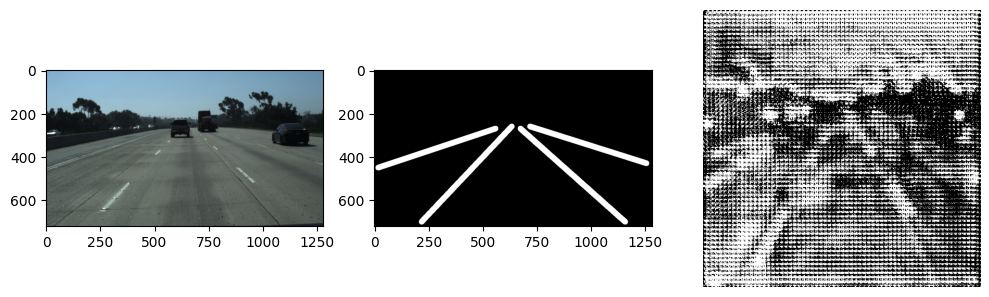

97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 573ms/step - accuracy: 0.9671 - dice_coefficient: 0.8621 - fpr: 0.0112 - loss: 0.1575 - mean_iou: 0.7578 - precision: 0.8869 - recall: 0.8027 - tpr: 0.8752 - val_accuracy: 0.9650 - val_dice_coefficient: 0.8435 - val_fpr: 0.0128 - val_loss: 0.1761 - val_mean_iou: 0.7295 - val_precision: 0.8680 - val_recall: 0.7902 - val_tpr: 0.8585 - learning_rate: 1.0000e-06
Epoch 19/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9671 - dice_coefficient: 0.8618 - fpr: 0.0112 - loss: 0.1578 - mean_iou: 0.7573 - precision: 0.8869 - recall: 0.8022 - tpr: 0.8748
Epoch 19: val_loss improved from 0.17614 to 0.17434, saving model to lane_detection.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


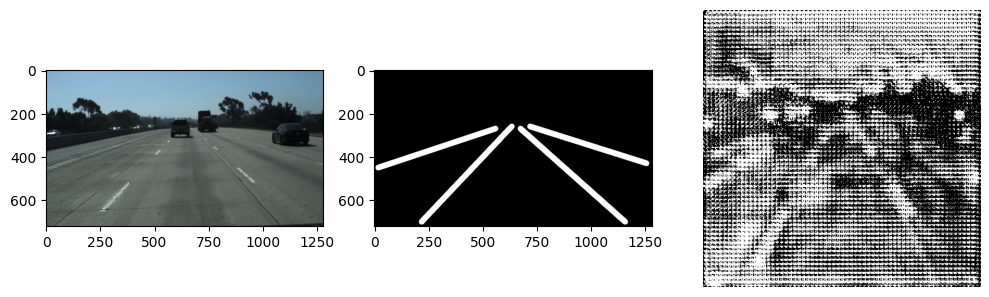

97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 558ms/step - accuracy: 0.9671 - dice_coefficient: 0.8618 - fpr: 0.0112 - loss: 0.1578 - mean_iou: 0.7573 - precision: 0.8869 - recall: 0.8022 - tpr: 0.8748 - val_accuracy: 0.9654 - val_dice_coefficient: 0.8453 - val_fpr: 0.0128 - val_loss: 0.1743 - val_mean_iou: 0.7321 - val_precision: 0.8671 - val_recall: 0.7940 - val_tpr: 0.8629 - learning_rate: 1.0000e-06
Epoch 20/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9670 - dice_coefficient: 0.8618 - fpr: 0.0111 - loss: 0.1578 - mean_iou: 0.7573 - precision: 0.8878 - recall: 0.8007 - tpr: 0.8734
Epoch 20: val_loss did not improve from 0.17434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


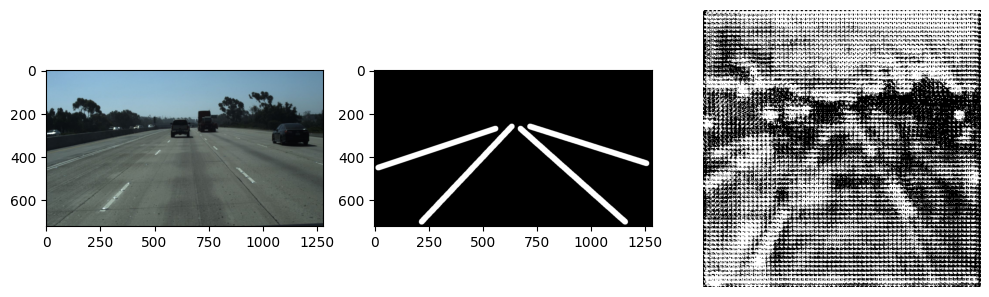

97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 519ms/step - accuracy: 0.9670 - dice_coefficient: 0.8618 - fpr: 0.0111 - loss: 0.1578 - mean_iou: 0.7573 - precision: 0.8878 - recall: 0.8007 - tpr: 0.8734 - val_accuracy: 0.9273 - val_dice_coefficient: 0.5894 - val_fpr: 0.0319 - val_loss: 0.4635 - val_mean_iou: 0.4629 - val_precision: 0.5826 - val_recall: 0.5319 - val_tpr: 0.6019 - learning_rate: 1.0000e-06
Epoch 21/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9672 - dice_coefficient: 0.8623 - fpr: 0.0113 - loss: 0.1573 - mean_iou: 0.7580 - precision: 0.8852 - recall: 0.8040 - tpr: 0.8770
Epoch 21: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 21: val_loss did not improve from 0.17434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


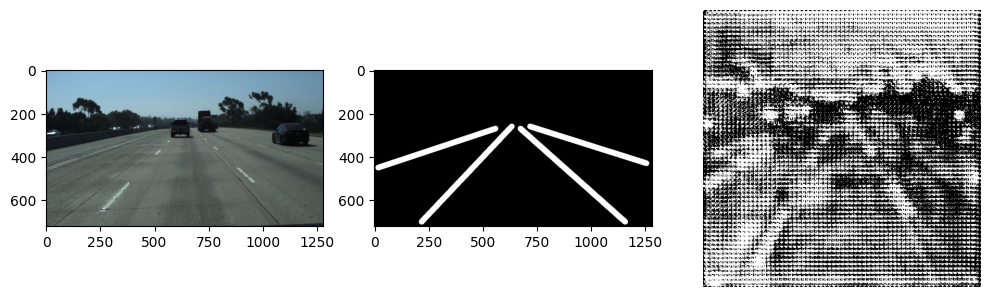

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 536ms/step - accuracy: 0.9672 - dice_coefficient: 0.8623 - fpr: 0.0113 - loss: 0.1573 - mean_iou: 0.7580 - precision: 0.8852 - recall: 0.8040 - tpr: 0.8769 - val_accuracy: 0.9482 - val_dice_coefficient: 0.6594 - val_fpr: 0.0259 - val_loss: 0.3086 - val_mean_iou: 0.5426 - val_precision: 0.7379 - val_recall: 0.6706 - val_tpr: 0.6700 - learning_rate: 1.0000e-06
Epoch 22/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.9672 - dice_coefficient: 0.8637 - fpr: 0.0110 - loss: 0.1560 - mean_iou: 0.7603 - precision: 0.8887 - recall: 0.8026 - tpr: 0.8761
Epoch 22: val_loss did not improve from 0.17434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


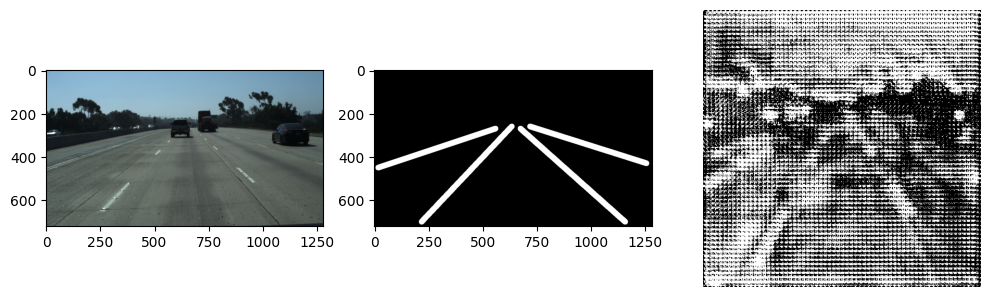

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.9672 - dice_coefficient: 0.8637 - fpr: 0.0110 - loss: 0.1560 - mean_iou: 0.7603 - precision: 0.8887 - recall: 0.8026 - tpr: 0.8761 - val_accuracy: 0.9642 - val_dice_coefficient: 0.8332 - val_fpr: 0.0137 - val_loss: 0.1796 - val_mean_iou: 0.7147 - val_precision: 0.8647 - val_recall: 0.7876 - val_tpr: 0.8484 - learning_rate: 1.0000e-07
Epoch 23/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9671 - dice_coefficient: 0.8623 - fpr: 0.0111 - loss: 0.1574 - mean_iou: 0.7580 - precision: 0.8873 - recall: 0.8018 - tpr: 0.8748
Epoch 23: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 23: val_loss did not improve from 0.17434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


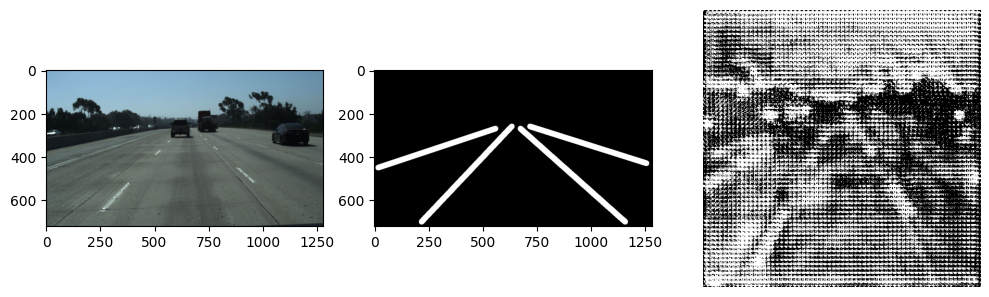

97/97 ━━━━━━━━━━━━━━━━━━━━ 52s 540ms/step - accuracy: 0.9671 - dice_coefficient: 0.8623 - fpr: 0.0111 - loss: 0.1574 - mean_iou: 0.7580 - precision: 0.8873 - recall: 0.8018 - tpr: 0.8748 - val_accuracy: 0.9651 - val_dice_coefficient: 0.8436 - val_fpr: 0.0131 - val_loss: 0.1747 - val_mean_iou: 0.7297 - val_precision: 0.8665 - val_recall: 0.7938 - val_tpr: 0.8626 - learning_rate: 1.0000e-07
Epoch 24/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9673 - dice_coefficient: 0.8634 - fpr: 0.0111 - loss: 0.1562 - mean_iou: 0.7597 - precision: 0.8877 - recall: 0.8036 - tpr: 0.8768
Epoch 24: val_loss did not improve from 0.17434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


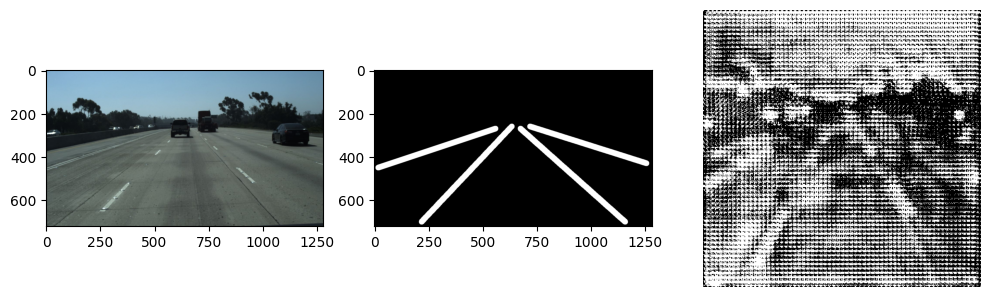

97/97 ━━━━━━━━━━━━━━━━━━━━ 53s 550ms/step - accuracy: 0.9673 - dice_coefficient: 0.8634 - fpr: 0.0111 - loss: 0.1562 - mean_iou: 0.7597 - precision: 0.8877 - recall: 0.8036 - tpr: 0.8768 - val_accuracy: 0.9646 - val_dice_coefficient: 0.8422 - val_fpr: 0.0130 - val_loss: 0.1775 - val_mean_iou: 0.7275 - val_precision: 0.8664 - val_recall: 0.7896 - val_tpr: 0.8576 - learning_rate: 1.0000e-08
Epoch 24: early stopping


In [32]:
steps_per_epoch = len(os.listdir("/kaggle/working/tusimple/train/images/images")) // BATCH_SIZE
validation_steps = len(os.listdir("/kaggle/working/tusimple/val/images/images")) // BATCH_SIZE
rnd=random_images()
history=model.fit(train_data_gen,epochs=40,validation_data=(val_data_gen),batch_size=BATCH_SIZE,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps,callbacks=[early_stop,red_lr,check_pt,rnd])

In [ ]:
pd.DataFrame(history.history).plot()

# Evaluation and prediction

In [ ]:
# load saved model
from tensorflow.keras.models import load_model
steps_per_epoch = len(os.listdir("/kaggle/working/tusimple/test/images/images")) // BATCH_SIZE

model = load_model("/kaggle/working/lane_detection.h5",custom_objects={'mean_iou': mean_iou,'dice_coefficient':dice_coefficient,'tpr':tpr,'fpr':fpr,'precision':keras.metrics.Precision(),'recall':keras.metrics.Recall()})

In [ ]:
# metrics testing on val_data
model.evaluate(test_data_gen,batch_size=BATCH_SIZE,steps=steps_per_epoch)

In [ ]:
def show_predictions():
    images=random.sample(sorted(os.listdir("/kaggle/working/tusimple/test/images/images")),4)
    
    for i in range(len(images)):
      plt.figure(figsize=(10,10))
      plt.subplot(1,2,1)
      a=plt.imread(os.path.join("/kaggle/working/tusimple/test/images/images",images[i]))
      plt.imshow(plt.imread(os.path.join("/kaggle/working/tusimple/test/images/images",images[i])))
      plt.subplot(1,2,2)

      a=cv2.resize(a,(input_shape[0],input_shape[1]))
      a=np.expand_dims(a,axis=0)
      print(a.shape)
      a=model.predict(a)[0]
      plt.imshow(a,cmap='gray')
      plt.axis('off')
      plt.show()
    plt.tight_layout()